In [1]:
'''
TODO: PREPROCESSING
    - Generate masks from json files.
    - Add image_path, mask_path, json_path and background path to database.
    - Load them into list of tuples in the format of numpy array from database and shuffle.
    - Augment images and append to list.
    - Split into train and val data.
    - Train images using U-net segmentation model.
'''


'\nTODO: PREPROCESSING\n    - Generate masks from json files.\n    - Add image_path, mask_path, json_path and background path to database.\n    - Load them into list of tuples in the format of numpy array from database and shuffle.\n    - Augment images and append to list.\n    - Split into train and val data.\n    - Train images using U-net segmentation model.\n'

In [2]:
import os
import numpy as  np
import matplotlib.pyplot as plt
import json
import config
from matplotlib.path import Path
import cv2
from dataset import *
from model import *
from dataset.augment import *


In [4]:
'''
Generate masks from json files and store in mask folder
# '''
# count = 0
# for file in os.listdir(config.IMAGE_DIRECTORY):
#     if file.split('.')[1] == 'json':
#         json_file = os.path.join(config.IMAGE_DIRECTORY, file) 
#         jpg_file = os.path.join(config.IMAGE_DIRECTORY, file.split('.')[0]+'.jpg')
#         generate_mask(jpg_file, json_file)



'\nGenerate masks from json files and store in mask folder\n# '

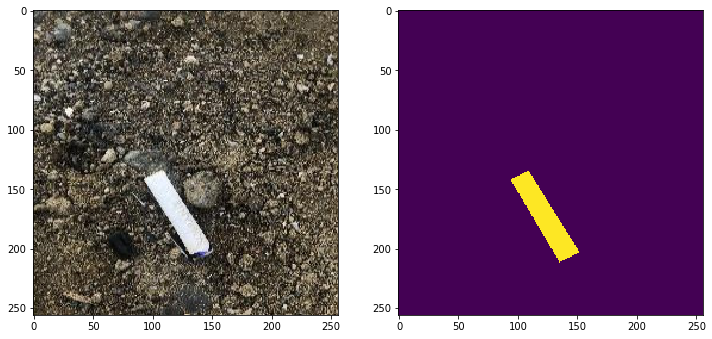

In [9]:
'''
Test with one image and mask
'''

json_files = os.listdir(config.MASK_DIRECTORY)
index = 20

mask_file = os.path.join(config.MASK_DIRECTORY, json_files[index])
jpg_file = mask_file.split('/')[-1].split('.')[0]
jpg_file = os.path.join(config.IMAGE_DIRECTORY, jpg_file+'.jpg')

img = plt.imread(jpg_file)
mask = np.load(mask_file)
fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(img)
ax[1].imshow(mask)


['IMG_6564.jpg', '00000103.jpg', 'IMG_6567.jpg', '00000550.jpg', 'IMG_6331.jpg'] ['00000609.npy', '00000587.npy', 'IMG_20200306_164230.npy', 'IMG_6396.npy', 'IMG_20200307_164356.npy']


In [3]:
'''
Add to database
'''
db = Dataset(config.DB_PATH)
# for file in os.listdir(config.IMAGE_DIRECTORY):
#     extension = file.split('/')[-1].split('.')[-1]
#     file_name = file.split('/')[-1].split('.')[0]
#     if extension == 'json':
#         json_file = os.path.join(config.IMAGE_DIRECTORY, file)
#         jpg_file = os.path.join(config.IMAGE_DIRECTORY, file_name+'.jpg')
#         mask_file = os.path.join(config.MASK_DIRECTORY, file_name+'.npy') 
#         db.add_Paths(jpg_file, mask_file, json_file, db.con)




In [4]:
'''
Load paths to list in the format of tuples
'''
util = Utils(db.load_paths(db.con, 609)) # we have 609 images in database
train_ds = util.load_images()
random.shuffle(train_ds)

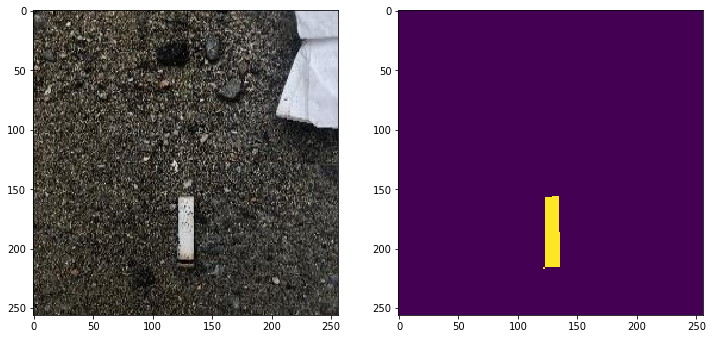

In [5]:
fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(train_ds[0][0])
ax[1].imshow(train_ds[0][1])


In [11]:
'''fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(img)
ax[1].imshow(mask)

Augment train data
'''
fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(img)
ax[1].imshow(mask)

nb_flip_augment = 300
for count in range(nb_flip_augment): 
    train_ds.append(rotate_augment(train_ds[count][0], train_ds[count][1]))

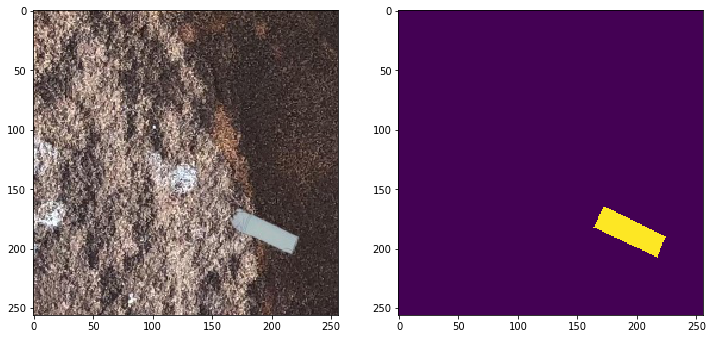

In [14]:
fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(train_ds[len(train_ds)-1][0])
ax[1].imshow(train_ds[len(train_ds)-1][1])

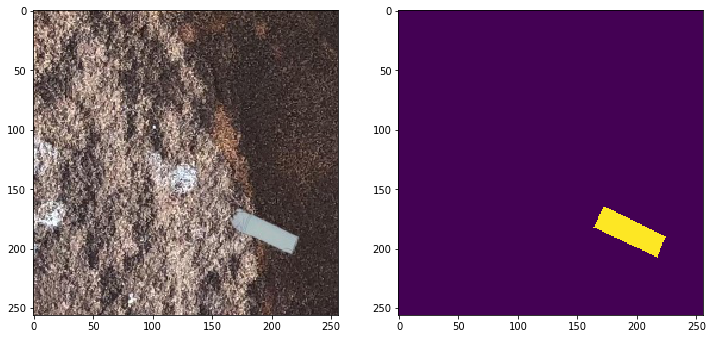

In [15]:
fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(train_ds[300-1][0])
ax[1].imshow(train_ds[300-1][1])

In [75]:
def view_img_mask(img, mask):
    fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
    ax[0].imshow(img)
    ax[1].imshow(mask)

In [90]:
(rot_img, rot_mask) = rot_augment(train_ds[0][0], train_ds[0][1])

2


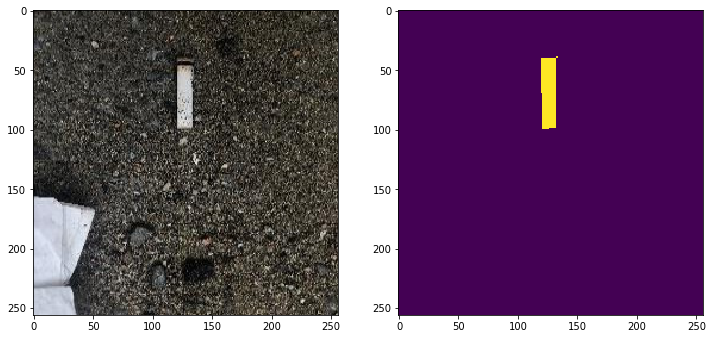

In [91]:
view_img_mask(rot_img, rot_mask)

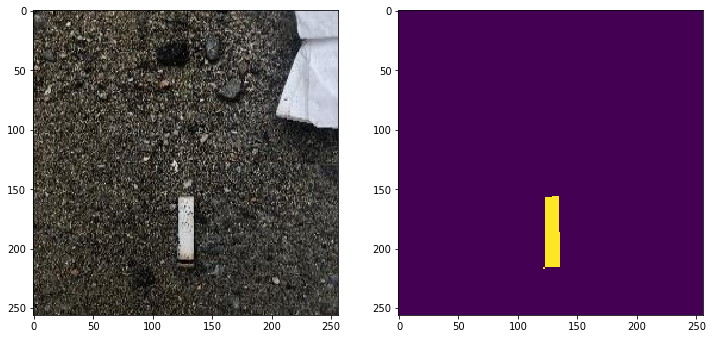

In [71]:
view_img_mask(train_ds[0][0], train_ds[0][1])